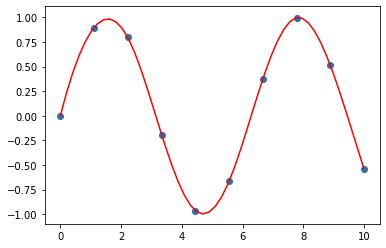

In [2]:
import numpy as np
import matplotlib.pyplot as plt
 
 
# Création d'un Dataset
x = np.linspace(0, 10, 10)
y = np.sin(x)
 
from scipy.interpolate import interp1d
 
# création de la fonction interpolation f
f = interp1d(x, y, kind='cubic')
 
# résultats de la fonction interpolation f sur de nouvelles données
new_x = np.linspace(0, 10, 50)
result = f(new_x)
 
# visualisation avec matplotlib
plt.scatter(x, y)
plt.plot(new_x, result, c='r')
plt.show()

In [ ]:
# Scipy vous permet élégamment d’effectuer des interpolations sur des images (en améliorer la résolution) 
# grâce à la fonction interp2d

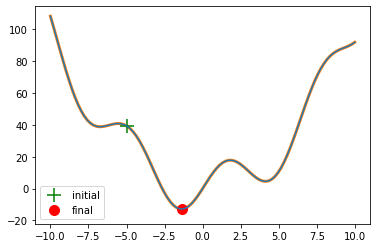

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
 
# Définition d'une fonction a 1 Dimension
def f (x):
    return x**2 + 15*np.sin(x)
 
 
# Visualisation de la fonction
x = np.linspace(-10, 10, 100)
plt.plot(x, f(x))
 
# Définition d'un point x0 pour l'algorithme de minimisation
x0=-5
result = scipy.optimize.minimize(f, x0=x0).x # résultat de la minimisation
 
# Visualisation du résultat
 
plt.plot(x, f(x), lw=3, zorder=-1) # Courbe de la fonction
plt.scatter(x0, f(x0), s=200, marker='+', c='g', zorder=1, label='initial') # point initial
plt.scatter(result, f(result), s=100, c='r', zorder=1, label='final') # point final
plt.legend()
plt.show()

# Il n’existe pas de fonction maximize() dans scipy car Maximiser une fonction revient à minimiser sa fonction négative
# Dans la pratique, nous effectuons donc tout le temps des minimisations.

[[0.]
 [0.]]
le minimum est aux coordonées [-0.78539916 -2.35619343]


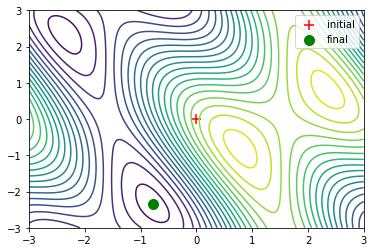

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
 
# Définition d'une fonction 2D. X est un tableau numpy a 2-Dimension
def f (x):
    return np.sin(x[0]) + np.cos(x[0]+x[1])*np.cos(x[0])
 
# Génération de la fonction sur un espace 2D.
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
x, y = np.meshgrid(x, y)
 
# Placement d'un point x0 initial aux coordonées (0,0)
x0 = np.zeros([2, 1])
print(x0)
# Minimisation de la fonction
result = scipy.optimize.minimize(f, x0=x0).x
print('le minimum est aux coordonées', result) # imprimer le résultat
 
# Visualisation du résultat
plt.contour(x, y, f(np.array([x, y])), 20) # fonction 2D
plt.scatter(x0[0], x0[1], marker='+', c='r', s=100, label='initial') # Point de départ
plt.scatter(result[0], result[1], c='g', s=100, label='final') # Point final
plt.legend()
plt.show()

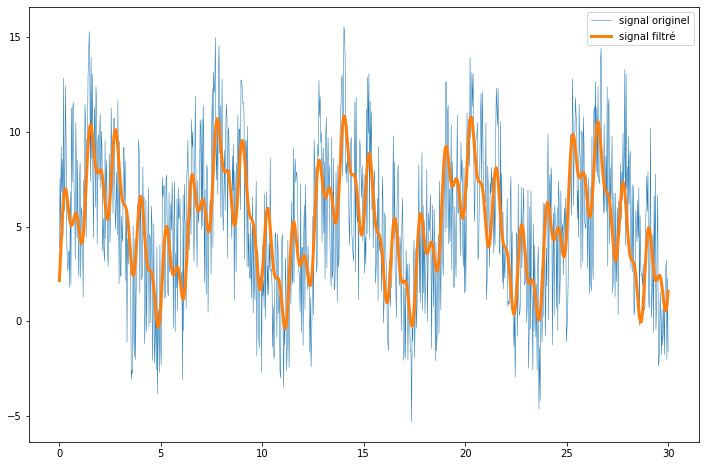

In [14]:
import numpy as np
import matplotlib.pyplot as plt
 
 
# Création d'un signal périodique noyé dans du bruit.
x = np.linspace(0, 30, 1000)
y = 3*np.sin(x) + 2*np.sin(5*x) + np.sin(10*x) + np.random.random(x.shape[0])*10
 
#print(np.random.random(x.shape[0]))
from scipy import fftpack
 
# création des variables Fourier et Fréquences, qui permettent de construire le spectre du signal.
fourier = fftpack.fft(y)
power = np.abs(fourier) # la variable power est créée pour éliminer les amplitudes négatives
frequences = fftpack.fftfreq(y.size)
 
 
# filtre du spectre avec du boolean indexing de Numpy
fourier[power<400] = 0
 
# Transformation de Fourier Inverse: genere un nouveau signal temporel depuis le spectre filtré
filtered_signal = fftpack.ifft(fourier)
 
# Visualisation des résultats
plt.figure(figsize=(12, 8))
plt.plot(x, y, lw=0.5, label='signal originel')
plt.plot(x, filtered_signal, lw=3, label='signal filtré')
plt.legend()
plt.show()